# Basic Imputation Techniques 

## Pandas 

### Mean - Median Imputation

In [24]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# raad the data
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

data = pd.read_csv("../Data/housing_prices.csv", usecols=cols_to_use)
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:
# the mean/median inputation is by calculating the mean/median on the training set 
# let us first divide the set into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 9), (292, 9), (1168,), (292,))

In [6]:
# we are going to use X_train for the mean/median calculation

# first let us get info about the X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  951 non-null    float64
 1   OverallQual  1168 non-null   int64  
 2   MasVnrArea   1162 non-null   float64
 3   BsmtUnfSF    1168 non-null   int64  
 4   TotalBsmtSF  1168 non-null   int64  
 5   1stFlrSF     1168 non-null   int64  
 6   GrLivArea    1168 non-null   int64  
 7   GarageYrBlt  1104 non-null   float64
 8   WoodDeckSF   1168 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 91.2 KB


In [7]:
# null values 
X_train.isnull().mean()

LotFrontage    0.185788
OverallQual    0.000000
MasVnrArea     0.005137
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.054795
WoodDeckSF     0.000000
dtype: float64

In [9]:
# filter out the columns which we need to impute 
impute_cols = list(filter(lambda col: data[col].isnull().mean()>0, X_train.columns))
impute_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

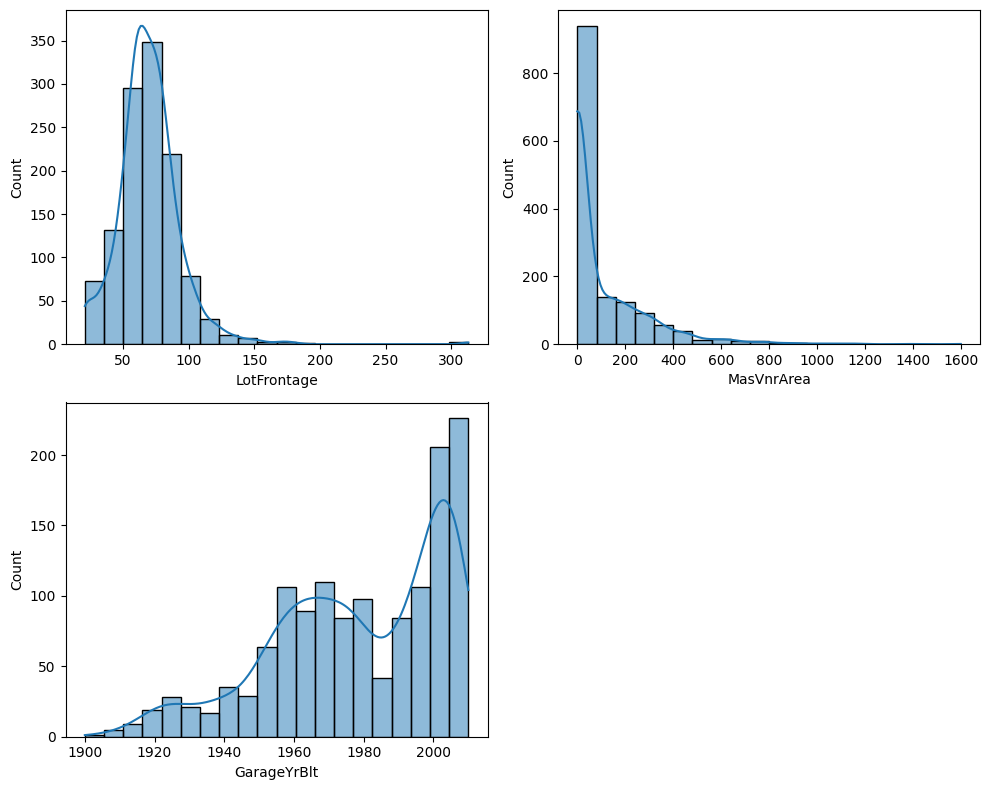

In [23]:
# let's plot the distribution of these three variables
fig, ax = plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,
             x='LotFrontage',
             ax=ax[0,0],
             bins=20,
             kde=True)

sns.histplot(data=data,
             x='MasVnrArea',
             ax=ax[0,1],
             bins=20,
             kde=True)

sns.histplot(data=data,
             x='GarageYrBlt',
             ax=ax[1,0],
             bins=20,
             kde=True)

# hide the non used axes 
ax[1,1].set_visible(False)

plt.tight_layout()
plt.show()

When dealing with missing values in a **skewed distribution**, **median imputation** is generally preferred over mean imputation. Here's why:

### 1. **Right-Skewed (Positively Skewed) Distribution**  
   - **Definition:** The tail on the right side is longer (e.g., income distribution).  
   - **Effect on Mean & Median:** The mean is **pulled to the right** due to large values, while the median remains **more stable**.  
   - **Best Imputation:** **Median** is preferred because it is less affected by outliers.

### 2. **Left-Skewed (Negatively Skewed) Distribution**  
   - **Definition:** The tail on the left side is longer (e.g., age at retirement).  
   - **Effect on Mean & Median:** The mean is **pulled to the left** due to smaller values, while the median remains **more stable**.  
   - **Best Imputation:** **Median** is still preferred as it better represents central tendency in skewed data.

### **Key Takeaway**  
- **For Normal Distribution → Mean Imputation**  
- **For Skewed Distributions (Right or Left) → Median Imputation**  

In [32]:
# Median Imputation - skewness present 

# Step 1 : Find the median of the impute_cols and place them in a dictionary
impute_dict = dict(zip(impute_cols, np.nanmedian(X_train[impute_cols], axis=0)))
impute_dict

{'LotFrontage': np.float64(70.0),
 'MasVnrArea': np.float64(0.0),
 'GarageYrBlt': np.float64(1980.0)}

In [ ]:
# Step 2: Replacing the missing values in X_train
X_train.fillna(impute_dict, inplace=True)

# Step 3: use the medin computed to fill nan values in the test set
X_test.fillna(impute_dict, inplace=True)

In [34]:
# Step 4: View the data to check whether there exists any other missing values 
X_train.isna().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [35]:
X_test.isna().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

**NOTE**
Just like median, for mean imputation use `np.mean` and the steps remain the same! 